# Random Forests

## Introduction
A Random Forest is a learning algorithm that builds multiple decision trees and merges their results for more accurate and stable predictions. 
Each tree makes a prediction, and the forest takes the majority vote or average as the final output.

A Decision Tree splits data based on feature values to make predictions.  
However, a single tree can overfit to training data and perform poorly on unseen data.

A Random Forest builds many decision trees:
   Each tree trains on a random subset of the data (with replacement).
   Each split in a tree considers only a random subset of features.
   The final output is decided by majority voting (classification) or averaging (regression).

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="species")
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
print("Shape of dataset:", X.shape)
print("Columns:", list(X.columns))
print("Target names:", data.target_names)

Shape of dataset: (150, 4)
Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

print("Training samples:", len(X_train))
print("Tesing samples:", len(X_test))

Training samples: 105
Tesing samples: 45


In [19]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

print("trained")

trained


In [23]:
y_pred = model.predict(X_test)

In [45]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc * 100, 2), "%")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 95.56 %
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



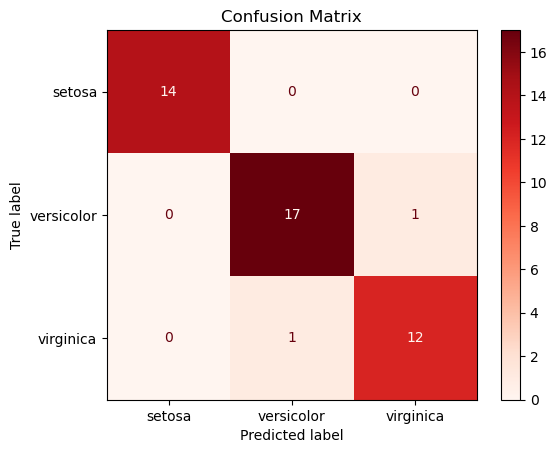

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

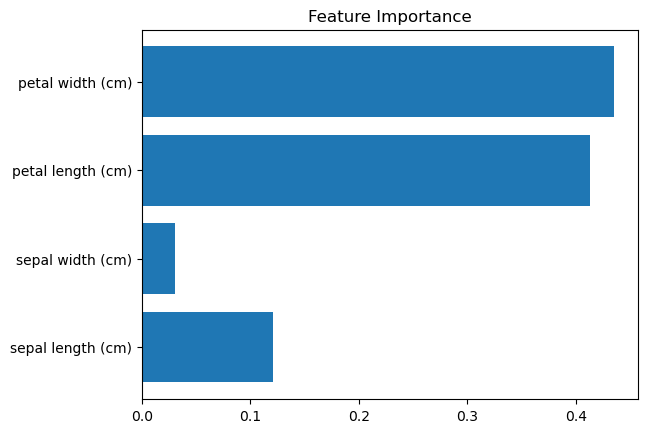

In [47]:
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.show()